In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import urllib2
import urllib
import json
import csv
import time
import pickle
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import sys
sns.set_style("whitegrid")
sns.set_context("poster")

In [15]:
eng_tweets_with_sent=pd.read_csv("eng_tweets_with_sent.csv")
trans_tweets_with_sent=pd.read_csv("trans_tweets_with_sent.csv")

In [19]:
trans_tweets_with_sent=trans_tweets_with_sent.drop('Unnamed: 0.1',1)
frames4=[eng_tweets_with_sent,trans_tweets_with_sent]
all_tweets_with_sent=pd.concat(frames4)

In [20]:
all_tweets_with_sent.to_csv("all_tweets_with_sent",index=False)

In [33]:
sentiment_features=all_tweets_with_sent.groupby(['Company',"Series"]).mean()
sentiment_features=sentiment_features.drop('Unnamed: 0',1)

In [34]:
sentiment_features.to_csv("sentiment_features")

In [37]:
sentiment_features=pd.read_csv("sentiment_features")
features_no_sentiment=pd.read_csv("features_no_sentiment.csv")

In [60]:
sentiment_features.head()

,company_name,Series,mean_neg,mean_pos,total_neg,total_pos
0,140Proof,_Series_B,0.020620,0.029136,0.022222,0.000000
1,1stdibs,_Series_C,0.038290,0.068850,0.010989,0.082418
2,2C2P,_Series_A,0.034891,0.043076,0.041667,0.083333
3,2C2P,_Series_B,0.011970,0.021867,0.000000,0.009804
4,2C2P,_Series_C,0.012391,0.015751,0.000000,0.009709


In [59]:
sentiment_features=sentiment_features.rename(columns={"Company":"company_name"})

In [39]:
features_no_sentiment.head()

,Unnamed: 0,Avg_Tweets,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,retweets_mean,persontag_count_mean,hashtag_count_mean,text_length_mean,persontags_count_mean,hashtags_count_mean,links_count_mean,self_mention_mean,self_tweet_mean,likes_std,retweets_std,persontag_count_std,hashtag_count_std,text_length_std,persontags_count_std,hashtags_count_std,links_count_std,self_mention_std,self_tweet_std,is_Biotechnology,is_Software,is_Health Care,is_Enterprise Software,is_Clean Technology,is_Hardware + Software,is_Semiconductors,is_Curated Web,is_Mobile,is_Web Hosting,is_Series_A,is_Series_B,is_Series_C,is_Series_D
0,0,16.384615,1stdibs,_Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,1.521127,0.957746,1.098592,130.516432,0.934272,1.093897,0.840376,0.436620,0.145540,5.780192,7.009816,1.087276,1.882052,38.451464,1.079570,1.876018,0.458529,0.515763,0.353475,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,1,1.603960,2tor,_Series_C,10,32,32500000,NaN,162,98,42,0.061728,0.197531,0.956790,0.574074,108.623457,0.864198,0.574074,0.697531,0.185185,0.000000,0.328584,0.648357,1.287053,0.648031,34.011510,1.268374,0.648031,0.486967,0.389652,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,163.000000,365Scores,_Series_B,15,23,5500000,Apps,163,1,1,0.092025,0.141104,0.582822,1.515337,181.895706,0.552147,1.490798,0.914110,0.184049,0.049080,0.348007,0.656189,0.822642,1.113086,43.445668,0.771029,1.090747,0.302230,0.388718,0.216700,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,3,2.109756,36Kr,_Series_C,58,21,20000,Startups,173,83,43,1.312139,0.393064,0.364162,0.520231,149.664740,0.289017,0.427746,0.630058,0.023121,0.000000,12.936146,2.761100,0.792618,1.009200,85.569792,0.680070,0.896851,0.518964,0.150725,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,4,0.696850,6fusion,_Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,0.158192,0.593220,0.468927,108.621469,0.564972,0.463277,0.576271,0.384181,0.050847,0.105996,0.462028,0.894147,0.783636,32.634132,0.896657,0.776104,0.539467,0.487781,0.220309,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [45]:
len(features_no_sentiment)

1210

In [46]:
len(sentiment_features)

3159

In [63]:
all_features = pd.DataFrame.merge(features_no_sentiment,sentiment_features, how="left")
all_features.to_csv("all_features")
#successfully merged sentiment features with non-sentiment features

In [72]:
all_features=pd.read_csv("all_features")

In [73]:
all_features_scaled=pd.read_csv("all_features_scaled.csv")

In [74]:
all_features_scaled.head()

,Unnamed: 0,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,retweets_mean,persontag_count_mean,hashtag_count_mean,text_length_mean,persontags_count_mean,hashtags_count_mean,links_count_mean,self_mention_mean,self_tweet_mean,likes_std,retweets_std,persontag_count_std,hashtag_count_std,text_length_std,persontags_count_std,hashtags_count_std,links_count_std,self_mention_std,self_tweet_std,is_Biotechnology,is_Software,is_Health Care,is_Enterprise Software,is_Clean Technology,is_Hardware + Software,is_Semiconductors,is_Curated Web,is_Mobile,is_Web Hosting,is_Series_A,is_Series_B,is_Series_C,is_Series_D,mean_neg,mean_pos,total_neg,total_pos,Total_Likes_scaled,Total_Retweets_scaled,Series_Amount_scaled,tweet_count_scaled,get_dayrange_scaled,get_dayiqr_scaled,likes_mean_scaled,retweets_mean_scaled,persontag_count_mean_scaled,hashtag_count_mean_scaled,text_length_mean_scaled,persontags_count_mean_scaled,hashtags_count_mean_scaled,links_count_mean_scaled,self_mention_mean_scaled,self_tweet_mean_scaled,likes_std_scaled,retweets_std_scaled,persontag_count_std_scaled,hashtag_count_std_scaled,text_length_std_scaled,persontags_count_std_scaled,hashtags_count_std_scaled,links_count_std_scaled,self_mention_std_scaled,self_tweet_std_scaled,is_Biotechnology_scaled,is_Software_scaled,is_Health Care_scaled,is_Enterprise Software_scaled,is_Clean Technology_scaled,is_Hardware + Software_scaled,is_Semiconductors_scaled,is_Curated Web_scaled,is_Mobile_scaled,is_Web Hosting_scaled,is_Series_A_scaled,is_Series_B_scaled,is_Series_C_scaled,is_Series_D_scaled,mean_neg_scaled,mean_pos_scaled,total_neg_scaled,total_pos_scaled
0,0,1stdibs,_Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,1.521127,0.957746,1.098592,130.516432,0.934272,1.093897,0.840376,0.436620,0.145540,5.780192,7.009816,1.087276,1.882052,38.451464,1.079570,1.876018,0.458529,0.515763,0.353475,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.038290,0.068850,0.010989,0.082418,5.490499,14.639506,131.530705,5.604621,2.919821,2.166753,0.277495,0.444905,0.514837,0.459289,11.352009,0.497760,0.451868,0.811684,0.130784,0.075215,0.616412,0.975505,0.571855,1.166297,1.643285,0.567140,1.198732,1.311422,0.412411,0.242416,0,0,0,0,0,0.00000,0.011027,0,0,0,0.000000,0.000000,0.14693,0,0.023806,0.041962,0.009406,0.055760
1,2,365Scores,_Series_B,15,23,5500000,Apps,163,1,1,0.092025,0.141104,0.582822,1.515337,181.895706,0.552147,1.490798,0.914110,0.184049,0.049080,0.348007,0.656189,0.822642,1.113086,43.445668,0.771029,1.090747,0.302230,0.388718,0.216700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.019701,0.046836,0.006329,0.006329,2.785031,6.249428,106.686057,5.315116,0.711572,0.702672,0.075718,0.117218,0.381770,0.515318,12.913690,0.363213,0.503921,0.880747,0.098722,0.038262,0.239491,0.410241,0.487835,0.800977,1.660524,0.467299,0.805124,0.608541,0.326192,0.169518,0,0,0,0,0,0.00000,0.000000,0,0,0,0.000000,0.533597,0.00000,0,0.015238,0.033029,0.005780,0.006125
2,3,36Kr,_Series_C,58,21,20000,Startups,173,83,43,1.312139,0.393064,0.364162,0.520231,149.664740,0.289017,0.427746,0.630058,0.023121,0.000000,12.936146,2.761100,0.792618,1.009200,85.569792,0.680070,0.896851,0.518964,0.150725,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.036364,0.058589,0.051546,0.077320,4.104487,5.957199,31.280916,5.379401,5.260371,4.079996,0.269588,0.248310,0.273717,0.316081,11.976510,0.227012,0.277611,0.613061,0.021111,0.000000,0.639420,0.794741,0.476969,0.743543,1.739574,0.431885,0.690736,1.694232,0.139991,0.000000,0,0,0,0,0,0.00000,0.000000,0,0,0,0.000000,0.000000,0.14693,0,0.023102,0.038169,0.026871,0.053475
3,4,6fusion,_Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,0.158192,0.593220,0.468927,108.621469,0.564972,0.463277,0.576271,0.384181,0.050847,0.105996,0.462028,0.894147,0.783636,32.634132,0.896657,0.776104,0.539467,0.487781,0.220309,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.021415,0.037837,0.000000,0.000000,1.100562,6.919969,112.210509,5.404103,6.859861,5.382639,0.011017,0.128725,0.386229,0.2966

In [77]:
all_features_scaled=all_features_scaled.drop("Unnamed: 0",1)

In [156]:
print np.max(all_features_scaled.Series_Amount)
print np.max(all_features_scaled.Series_Amount_scaled)

74000000
182.929954352


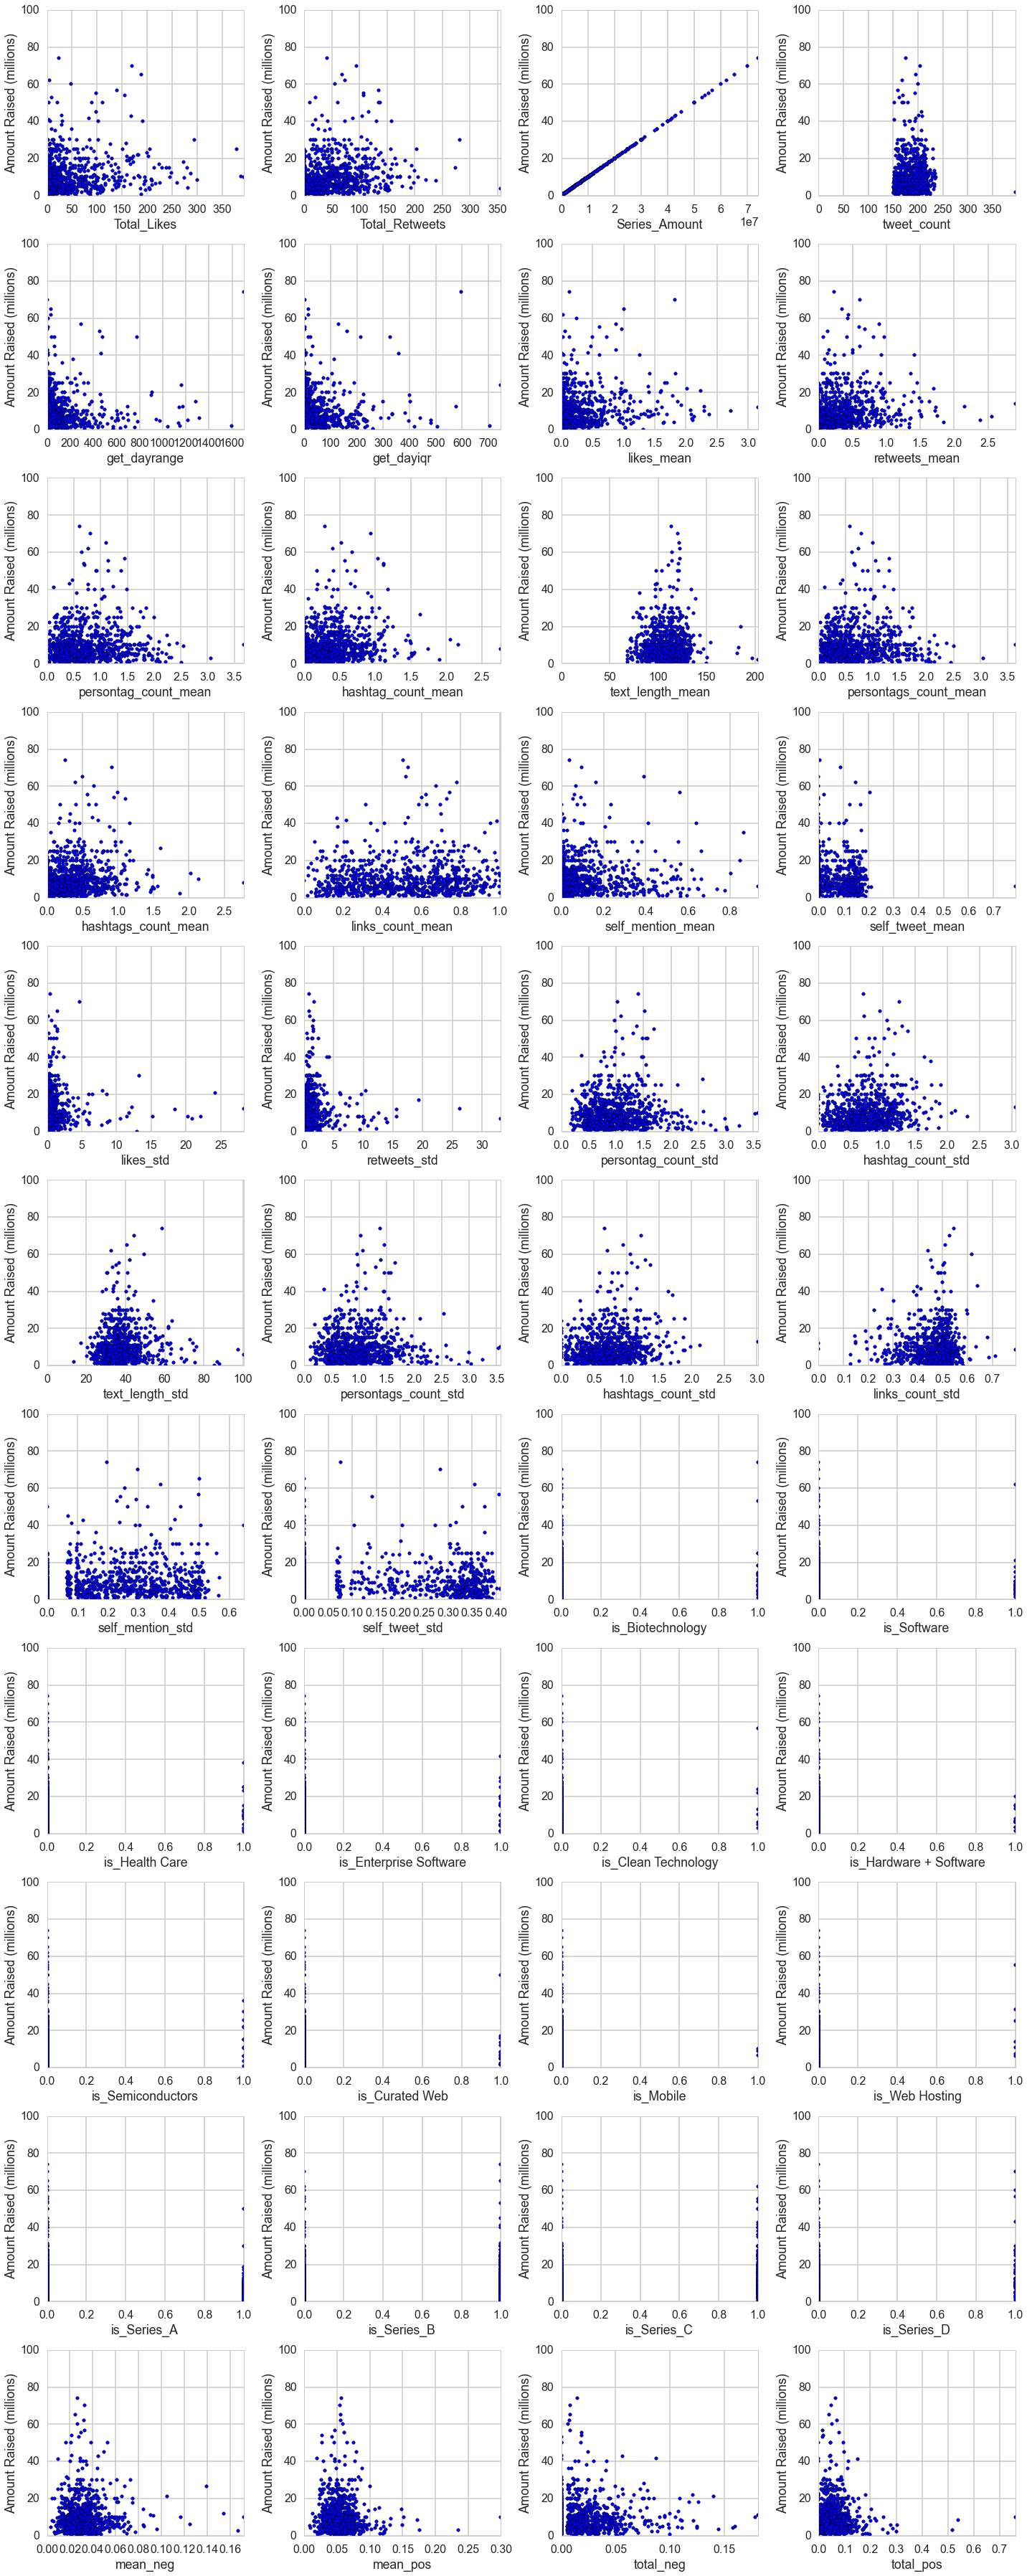

In [154]:
#Unscaled series_amount (i.e. amount raised) vs unscaled features
numeric_features=[x for x in all_features_scaled.columns.values if x not in ['company_name','Series','Market']]
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20, 50), tight_layout=True)
N=len(numeric_features)
for i,feature in enumerate(numeric_features[:N/2]):
    ax=axes.ravel()[i]
    ax.scatter(x=all_features_scaled[feature],y=all_features_scaled.Series_Amount/10**6)
    xlim=np.max(all_features_scaled[feature])
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,100)
    ax.set_xlabel('%s'%feature)
    ax.set_ylabel('Amount Raised (millions)')

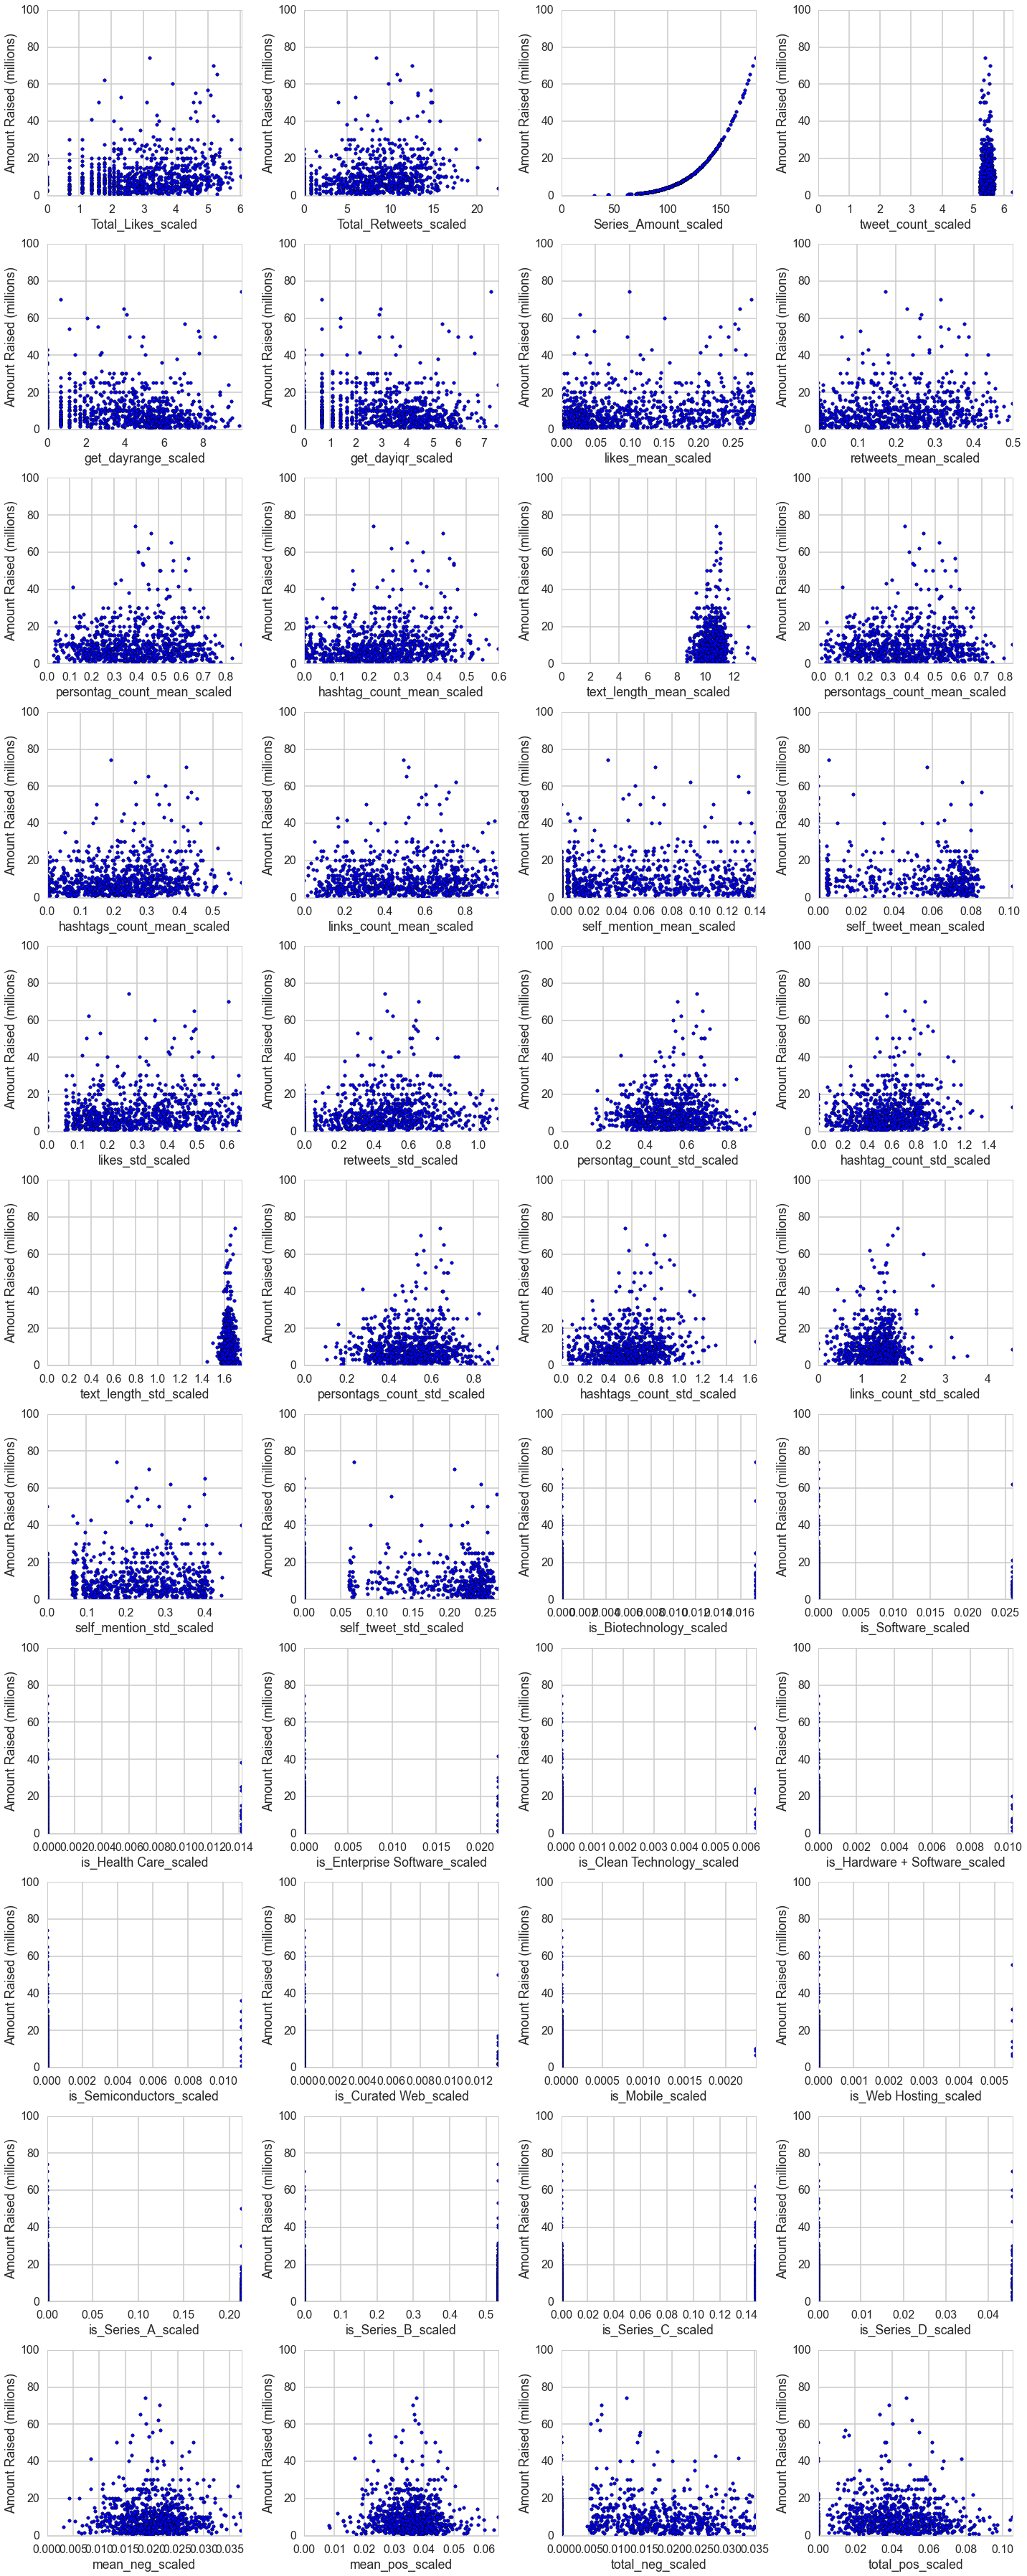

In [153]:
#Unscaled series_amount (i.e. amount raised) vs scaled features (boxcox transform)
fig1, axes1 = plt.subplots(nrows=11, ncols=4, figsize=(20, 50), tight_layout=True)
for i,feature in enumerate(numeric_features[N/2:N]):
    ax=axes1.ravel()[i]
    ax.scatter(x=all_features_scaled[feature],y=all_features_scaled.Series_Amount/10**6)
    xlim=np.max(all_features_scaled[feature])
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,100)
    ax.set_xlabel('%s'%feature)
    ax.set_ylabel('Amount Raised (millions)')

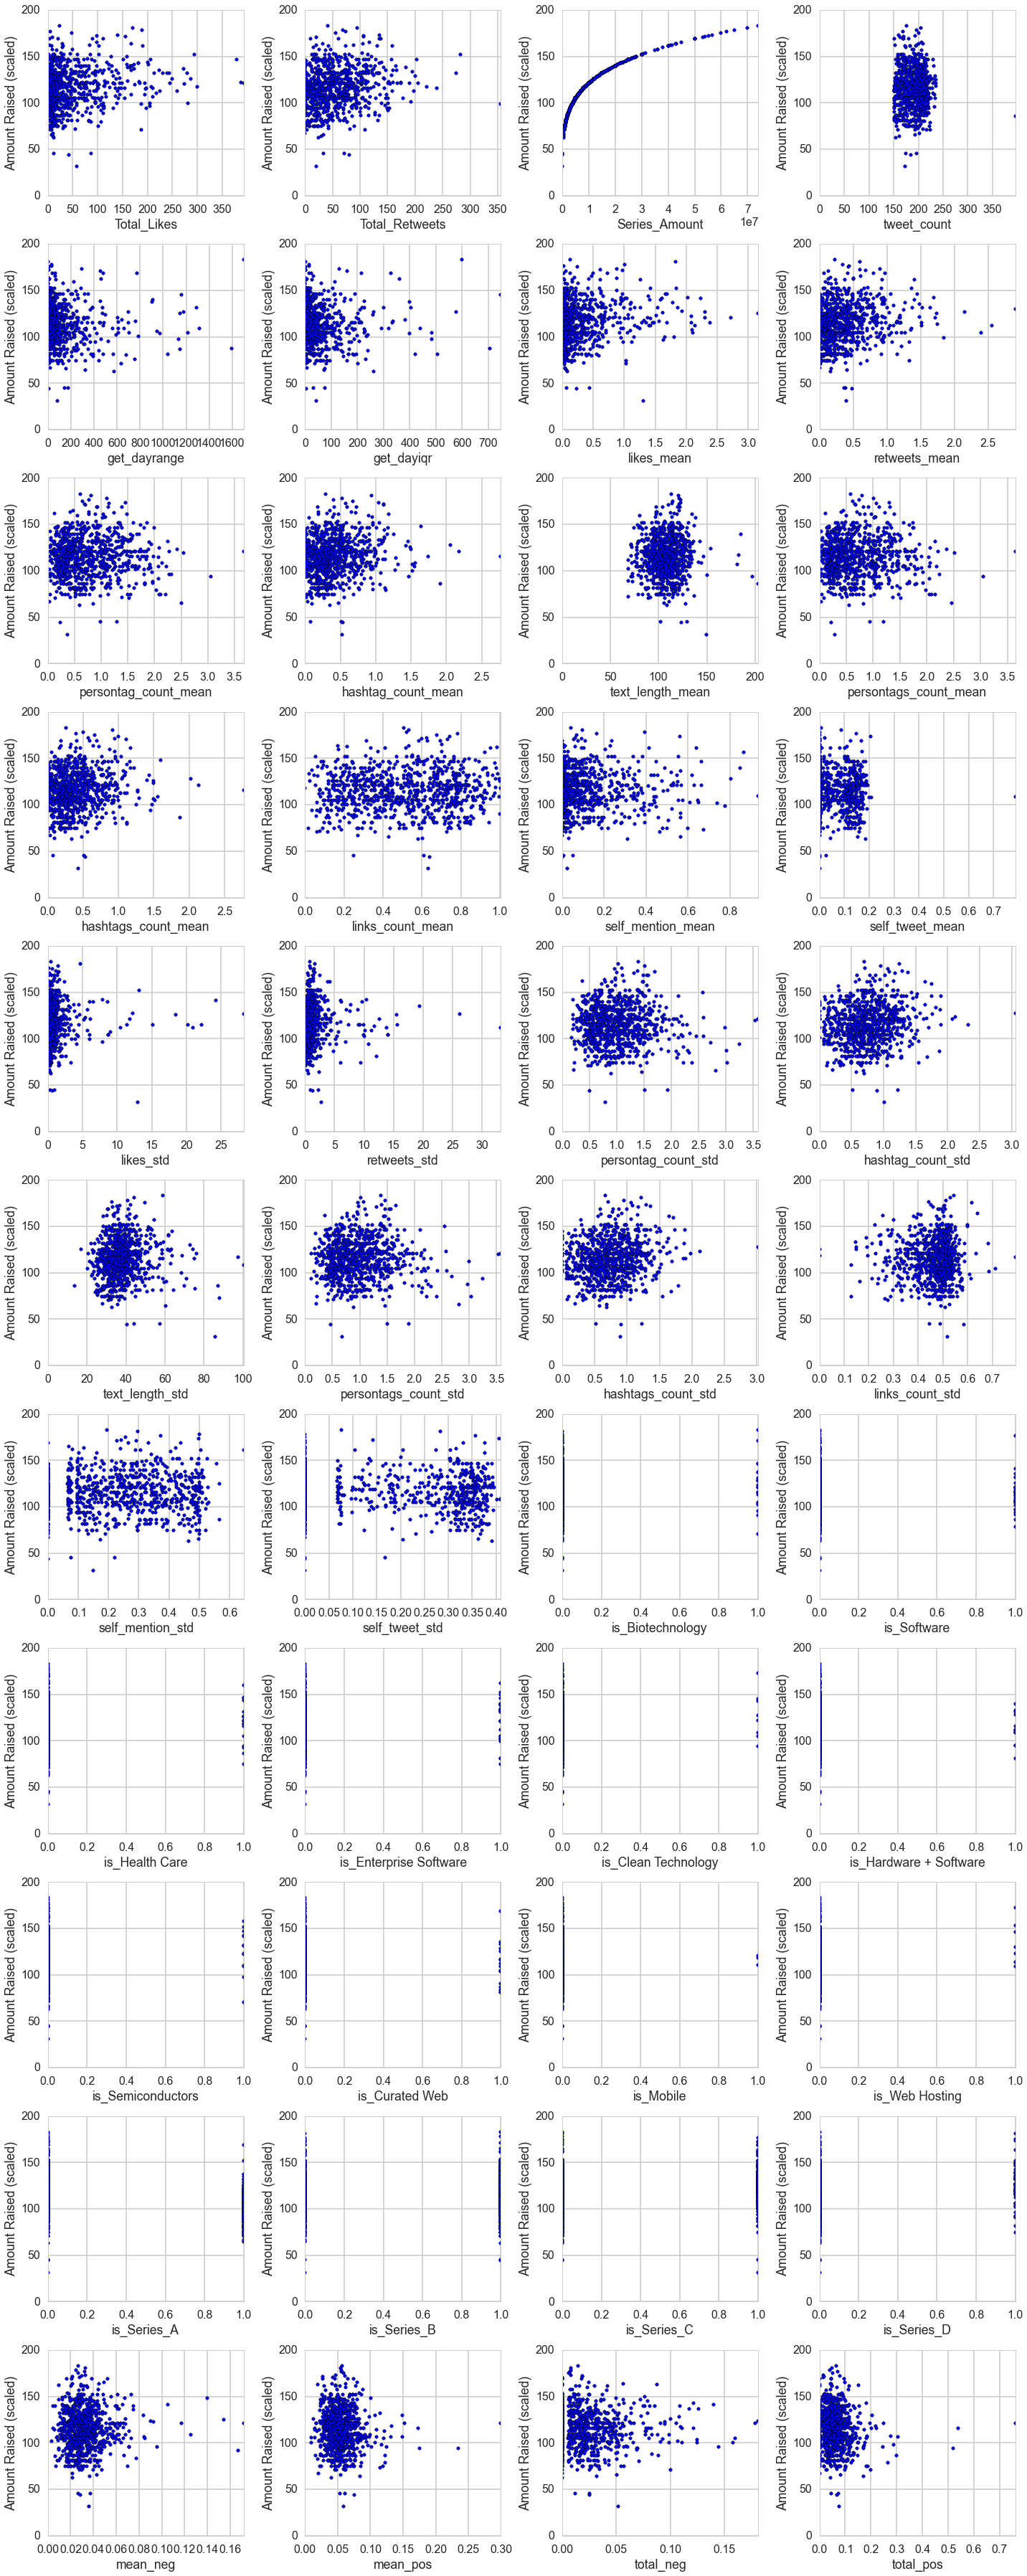

In [157]:
#Scaled series_amount (i.e. amount raised) vs unscaled features
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20, 50), tight_layout=True)
N=len(numeric_features)
for i,feature in enumerate(numeric_features[:N/2]):
    ax=axes.ravel()[i]
    ax.scatter(x=all_features_scaled[feature],y=all_features_scaled.Series_Amount_scaled)
    xlim=np.max(all_features_scaled[feature])
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,200)
    ax.set_xlabel('%s'%feature)
    ax.set_ylabel('Amount Raised (scaled)')

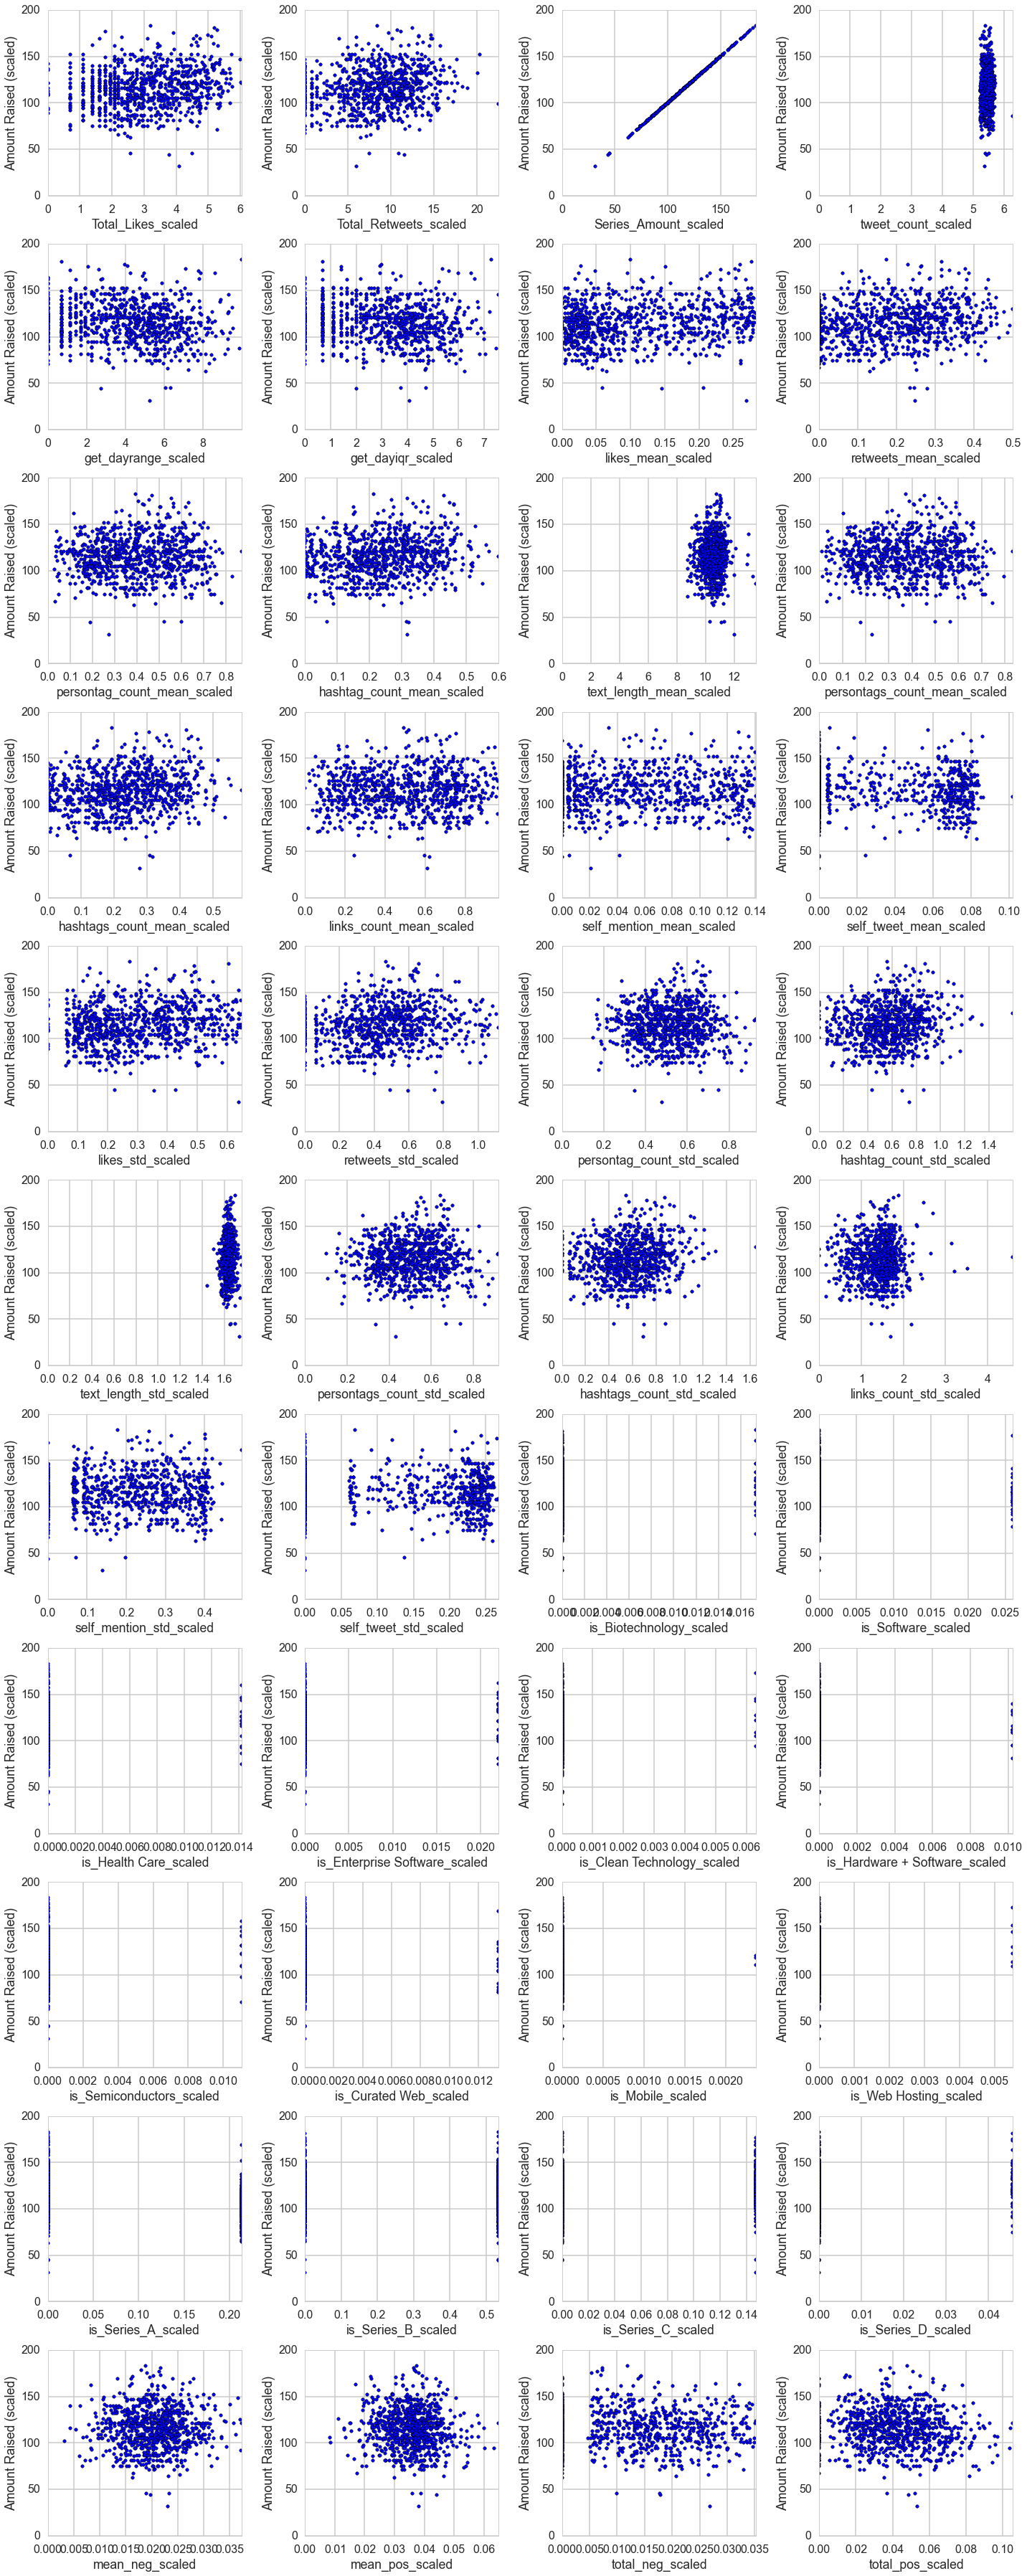

In [158]:
#Scaled series_amount (i.e. amount raised) vs scaled features
fig1, axes1 = plt.subplots(nrows=11, ncols=4, figsize=(20, 50), tight_layout=True)
for i,feature in enumerate(numeric_features[N/2:N]):
    ax=axes1.ravel()[i]
    ax.scatter(x=all_features_scaled[feature],y=all_features_scaled.Series_Amount_scaled)
    xlim=np.max(all_features_scaled[feature])
    ax.set_xlim(0,xlim)
    ax.set_ylim(0,200)
    ax.set_xlabel('%s'%feature)
    ax.set_ylabel('Amount Raised (scaled)')